# 🏠 American House Prices: Multiple Linear Regression Analysis

## 📌 Introduction

This notebook explores how various housing features such as **number of bedrooms**, **bathrooms**, and **living space** influence **house prices** in American cities. The dataset is sourced from [Kaggle](https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities/data), containing detailed information about real estate listings, including zip codes and demographic information.

## 🎯 Objective

The goal of this analysis is to:

1. **Build a multiple linear regression model** to predict house prices using key predictors: `beds`, `baths`, and `living_space`.
2. **Check the assumptions** of linear regression, including:
   - Linearity
   - Normality of residuals
   - Homoscedasticity
   - Multicollinearity
3. **Apply transformations and feature engineering** (e.g., log transformations, interaction terms, winsorization) to improve model performance and interpretation.
4. **Interpret the regression results** to understand the impact of each variable on housing prices.

Visualization techniques, diagnostics, and statistical testing (e.g., VIF, Breusch-Pagan test) are used throughout to ensure the robustness of the model and identify potential violations of model assumptions.


#PART 1

We're using this data from Kaggle for MULTIPLE LINEAR REGRESSION:

[American House Prices](https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities/data)

Investigate the predictors, beds, baths, and living space with the dependent variable price.

Note: Make sure to check assumptions. Are there assumptions that are violated?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('American_Housing_Data_20231209.csv')

df = df.rename(columns={'Zip Code':'zipcode','Price':'price', 'Beds':'beds','Baths':'baths','Living Space':'living_space','City':'city'})
df

,zipcode,price,beds,baths,living_space,Address,city,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223


In [ ]:
df.columns

Index(['zipcode', 'price', 'beds', 'baths', 'living_space', 'Address', 'city',
       'State', 'Zip Code Population', 'Zip Code Density', 'County',
       'Median Household Income', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import statsmodels.api as sm


X = df[['beds', 'baths', 'living_space']]
X = sm.add_constant(X)
y = df['price']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     5684.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:38:17   Log-Likelihood:            -5.9981e+05
No. Observations:               39981   AIC:                         1.200e+06
Df Residuals:                   39977   BIC:                         1.200e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.288e+04   1.05e+04     -4.099   

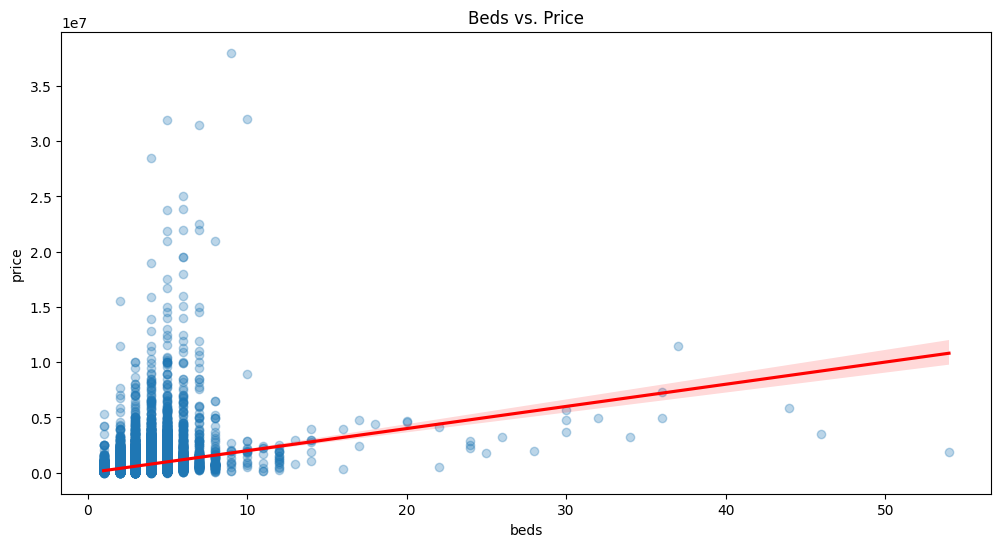

In [ ]:
# bed vs price

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.regplot(x='beds', y='price', data=df,
            scatter_kws={'alpha':0.3},
            line_kws={'color':'red'})
plt.title('Beds vs. Price')
plt.show()

In [ ]:
from scipy.stats import pearsonr
corr, p = pearsonr(df['beds'], df['price'])
print(f"Correlation: {corr:.3f}, p-value: {p:.3e}")

Correlation: 0.277, p-value: 0.000e+00


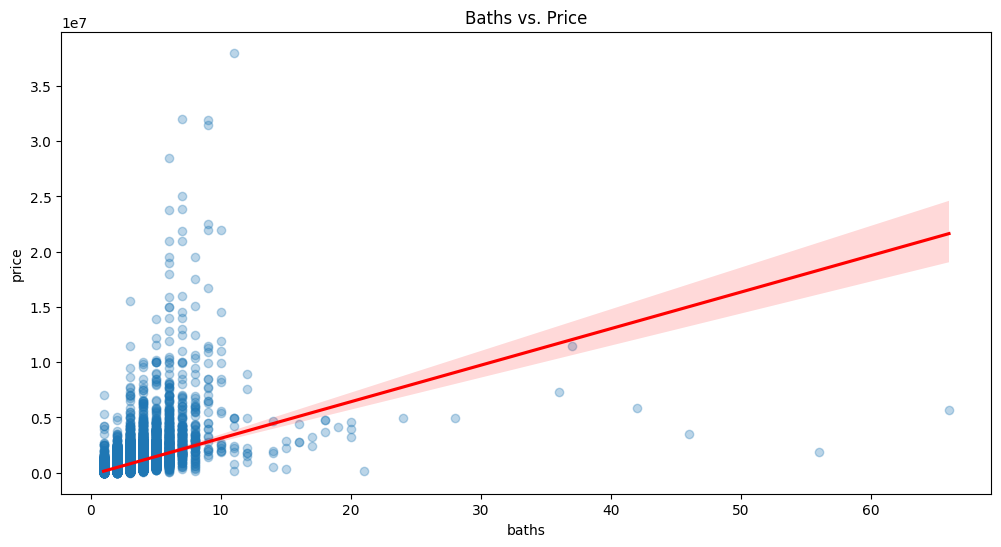

In [ ]:
# baths vs price
plt.figure(figsize=(12, 6))
sns.regplot(x='baths', y='price', data=df,
            scatter_kws={'alpha':0.3},
            line_kws={'color':'red'})
plt.title('Baths vs. Price')
plt.show()

In [ ]:
corr, p = pearsonr(df['baths'], df['price'])
print(f"Correlation: {corr:.3f}, p-value: {p:.3e}")

Correlation: 0.462, p-value: 0.000e+00


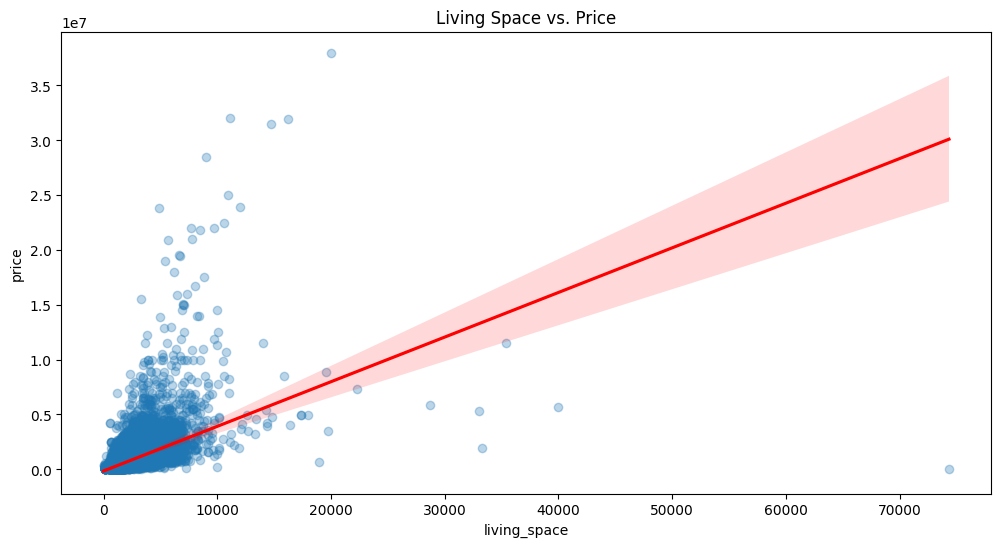

In [ ]:
# living space vs price
plt.figure(figsize=(12, 6))
sns.regplot(x='living_space', y='price', data=df,
            scatter_kws={'alpha':0.3},
            line_kws={'color':'red'})
plt.title('Living Space vs. Price')
plt.show()

In [ ]:
corr, p = pearsonr(df['living_space'], df['price'])
print(f"Correlation: {corr:.3f}, p-value: {p:.3e}")

Correlation: 0.521, p-value: 0.000e+00


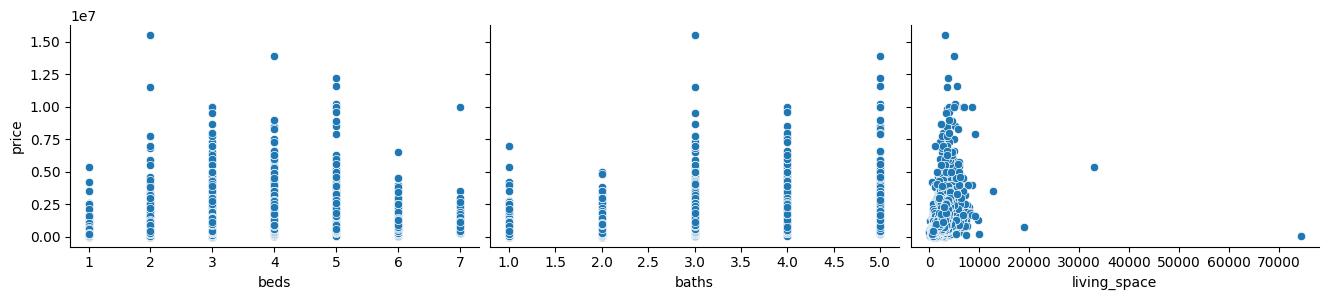

In [ ]:
# Scatterplots vs Price
sns.pairplot(df, x_vars=['beds', 'baths', 'living_space'], y_vars=['price'], kind='scatter',height=3, aspect=1.5)
plt.show()

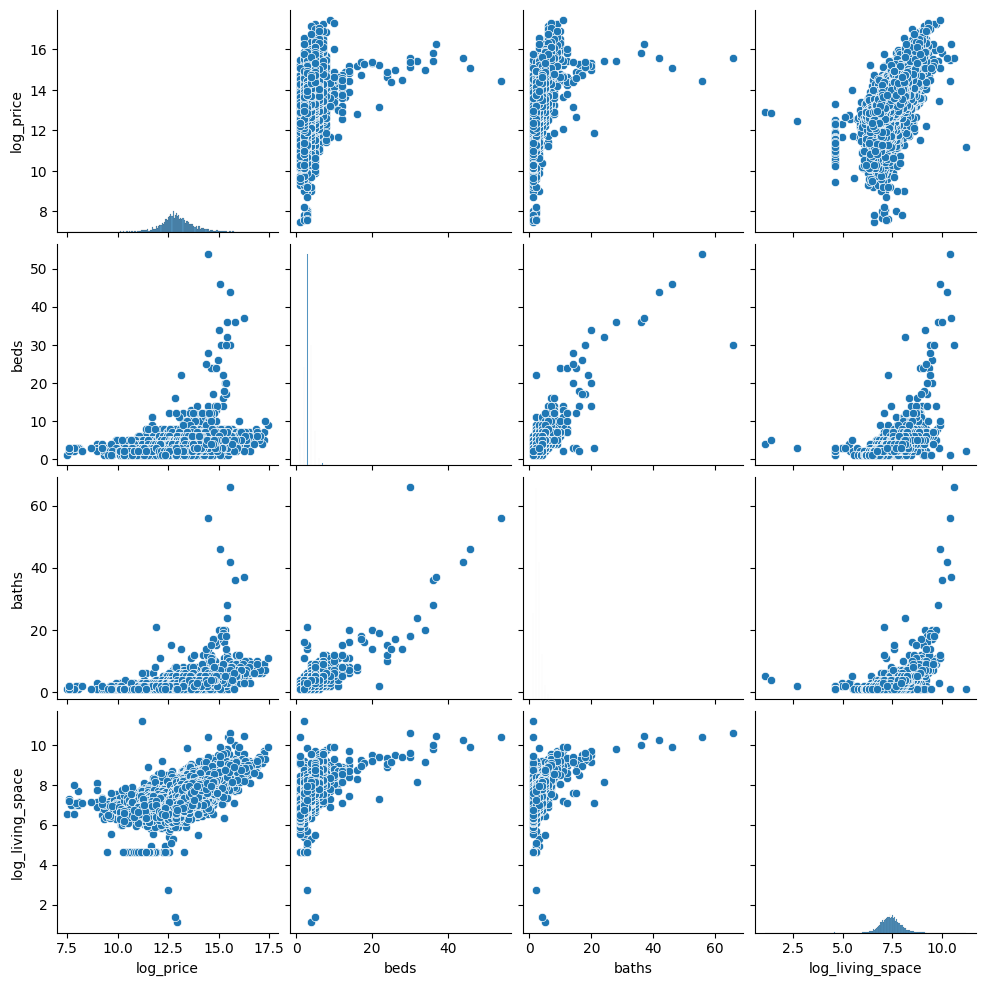

In [ ]:
df['log_price'] = np.log1p(df['price'])
df['log_living_space'] = np.log1p(df['living_space'])

# Pairplots for visual inspection
sns.pairplot(df[['log_price', 'beds', 'baths', 'log_living_space']])
plt.show()

In [ ]:
X = df[['beds', 'baths', 'living_space']]
vif = pd.DataFrame([variance_inflation_factor(X.values, i) for i in range(3)],
                  index=X.columns, columns=['VIF'])
print(vif)

                    VIF
beds           9.434953
baths         13.053038
living_space   9.006328


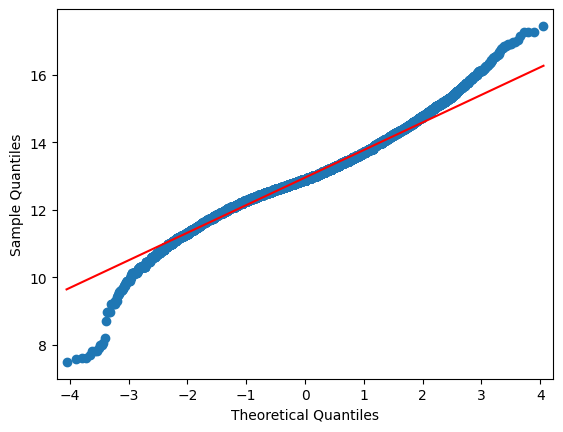

In [ ]:
sm.qqplot(df['log_price'], line='s')
plt.show()

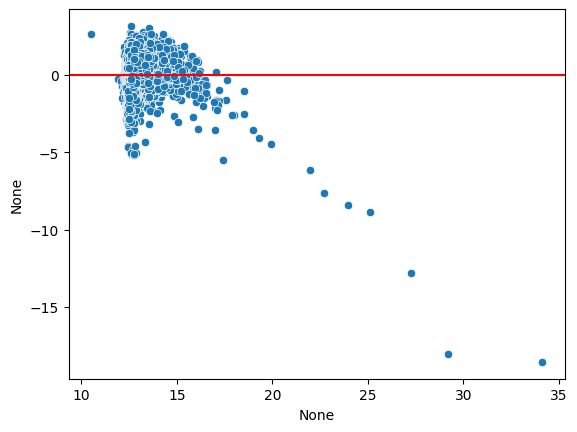

In [ ]:
model = sm.OLS(df['log_price'], sm.add_constant(X)).fit()
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(0, color='red')
plt.show()

In [ ]:
import statsmodels.formula.api as smf

# Feature engineering
df['rooms'] = df['beds'] + df['baths']
df = df[df['beds'] < 8]  # Remove extreme beds
df = df[df['baths'] < 6] # Remove extreme baths


X = df[['zipcode','beds', 'baths', 'living_space']]
X = sm.add_constant(X)
y = df['price']

model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     3332.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:40:15   Log-Likelihood:            -5.7028e+05
No. Observations:               39138   AIC:                         1.141e+06
Df Residuals:                   39133   BIC:                         1.141e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -2.11e+05   1.09e+04    -19.341   

<Axes: xlabel='log_living_space', ylabel='log_price'>

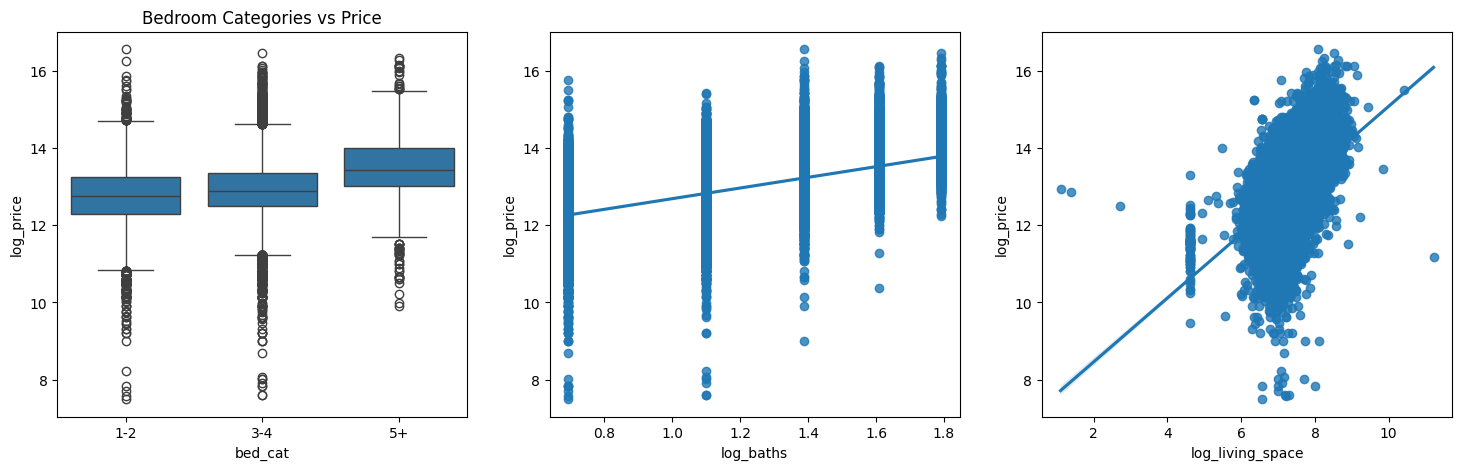

In [ ]:
# Categorize beds
df['bed_cat'] = pd.cut(df['beds'],
                       bins=[0, 2, 4, 20],
                       labels=['1-2', '3-4', '5+'])

# Transformations
df['log_baths'] = np.log1p(df['baths'])


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='bed_cat', y='log_price', data=df, ax=axes[0])
axes[0].set_title('Bedroom Categories vs Price')

# Create dummies manually
df = pd.get_dummies(df, columns=['bed_cat'], drop_first=True)


# Now plot using the dummy column
sns.regplot(x='log_baths', y='log_price', data=df, ax=axes[1])
sns.regplot(x='log_living_space', y='log_price', data=df, ax=axes[2])

In [ ]:
df

,zipcode,price,beds,baths,living_space,Address,city,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,log_price,log_living_space,rooms,log_baths,bed_cat_3-4,bed_cat_5+
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472,15.201555,7.584773,5,1.386294,False,False
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472,15.201555,7.584773,5,1.386294,False,False
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,14.316286,6.577861,2,0.693147,False,False
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,13.541075,7.338888,5,1.098612,True,False
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601,13.910822,6.398595,2,0.693147,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39976,98199,2495000.0,4,4,3380,2626 27TH AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,14.729800,8.125927,8,1.609438,True,False
39977,98199,2295000.0,4,4,2878,3215 32ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,14.646244,7.965198,8,1.609438,True,False
39978,98199,950000.0,3,2,1380,3257 22ND AVE W,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,13.764218,7.230563,5,1.098612,True,False
39979,98199,425000.0,2,1,856,3711 26TH PL W APT 102,Seattle,Washington,22890,2086.8,King,205611.0,47.65139,-122.40223,12.959847,6.753438,3,0.693147,False,False


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     3862.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:47:23   Log-Likelihood:                -37713.
No. Observations:               39138   AIC:                         7.544e+04
Df Residuals:                   39132   BIC:                         7.549e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13

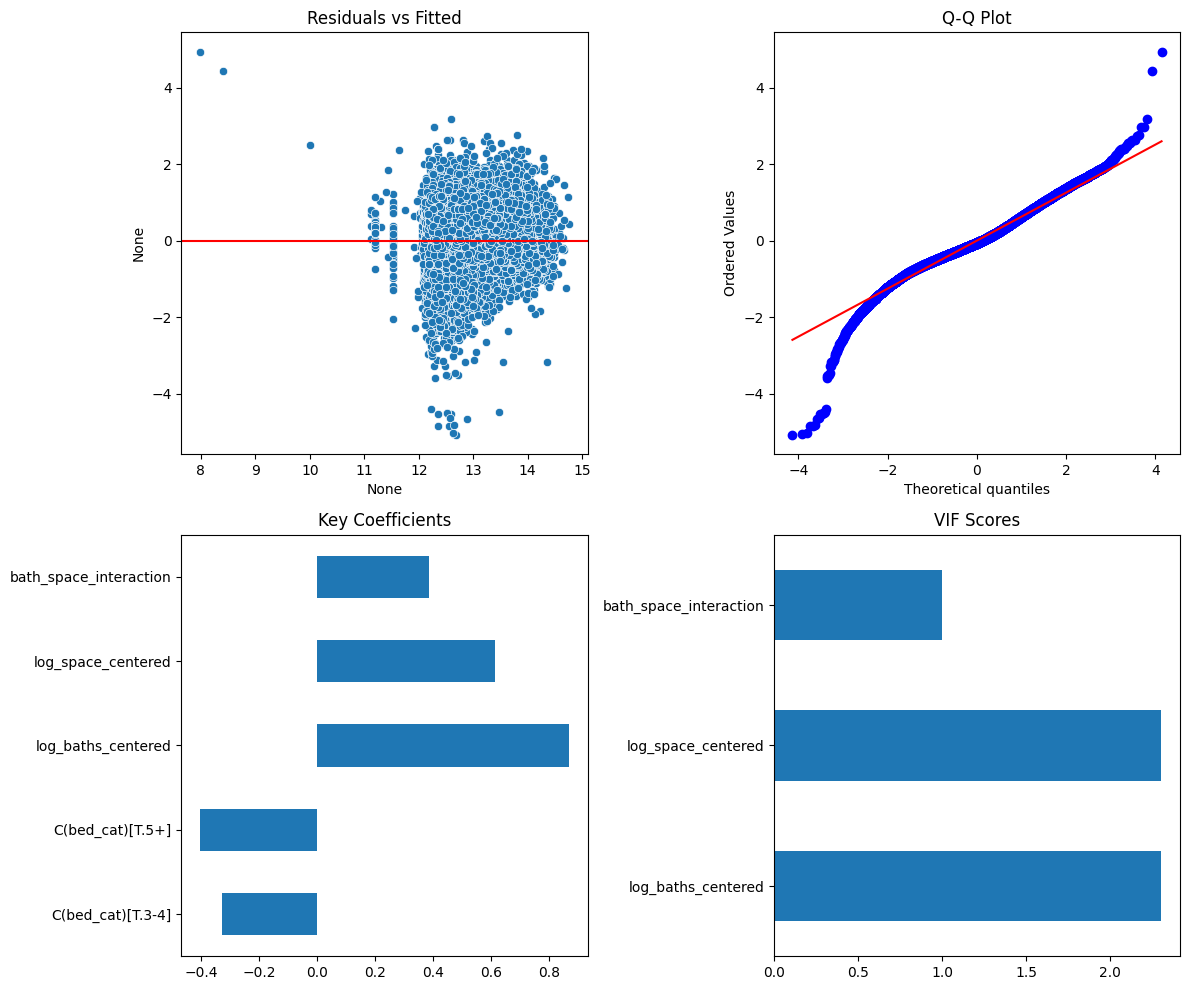

In [ ]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


df = df.assign(
    log_price = np.log1p(df['price']),
    log_baths = np.log1p(df['baths']),
    log_space = np.log1p(df['living_space']),
    bed_cat = pd.cut(df['beds'], bins=[0, 2, 4, 20], labels=['1-2', '3-4', '5+'])
)

# 2. Center variables before interaction
df['log_baths_centered'] = df['log_baths'] - df['log_baths'].mean()
df['log_space_centered'] = df['log_space'] - df['log_space'].mean()
df['bath_space_interaction'] = df['log_baths_centered'] * df['log_space_centered']

#  Model Specification
model = smf.ols('''
    log_price ~
    C(bed_cat) +
    log_baths_centered +
    log_space_centered +
    bath_space_interaction
''', data=df).fit()


print(model.summary())


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=axes[0,0])
axes[0,0].axhline(0, color='red')
axes[0,0].set_title('Residuals vs Fitted')

# Q-Q Plot
stats.probplot(model.resid, plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot')

# Coefficients Plot
coefs = model.params[1:6]
coefs.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title('Key Coefficients')

# VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['log_baths_centered', 'log_space_centered', 'bath_space_interaction']]
vif = pd.DataFrame([variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])],
                  index=X.columns, columns=['VIF'])
vif.plot(kind='barh', ax=axes[1,1], legend=False)
axes[1,1].set_title('VIF Scores')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Square Root Transform')

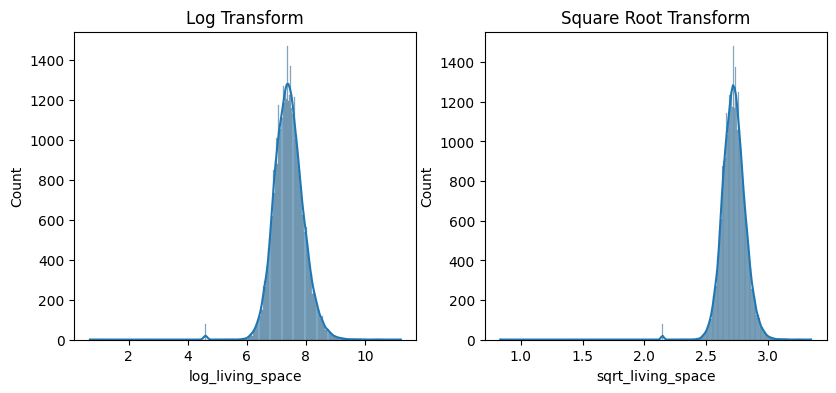

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.histplot(df_no_outliers['log_living_space'], kde=True)
plt.title('Log Transform')

plt.subplot(132)
sns.histplot(df_no_outliers['sqrt_living_space'], kde=True)
plt.title('Square Root Transform')

# plt.subplot(133)
# sns.boxplot(x='living_space_bins', y='price', data=df)
# plt.title('Binned Relationship with Price')

In [ ]:
# Winsorization (cap top 1%)
from scipy.stats.mstats import winsorize
df_no_outliers['living_space_win'] = winsorize(df_no_outliers['log_living_space'], limits=[0, 0.01])


# q99 = df_no_outliers['log_living_space'].quantile(0.99)
# df_no_outliers = df_no_outliers[df_no_outliers['log_living_space'] <= q99]

Text(0.5, 1.0, 'Log Transform')

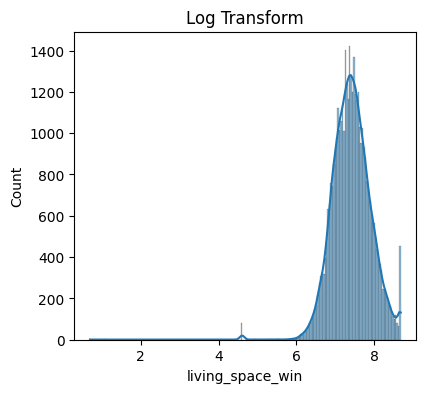

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.histplot(df_no_outliers['living_space_win'], kde=True)
plt.title('Log Transform')

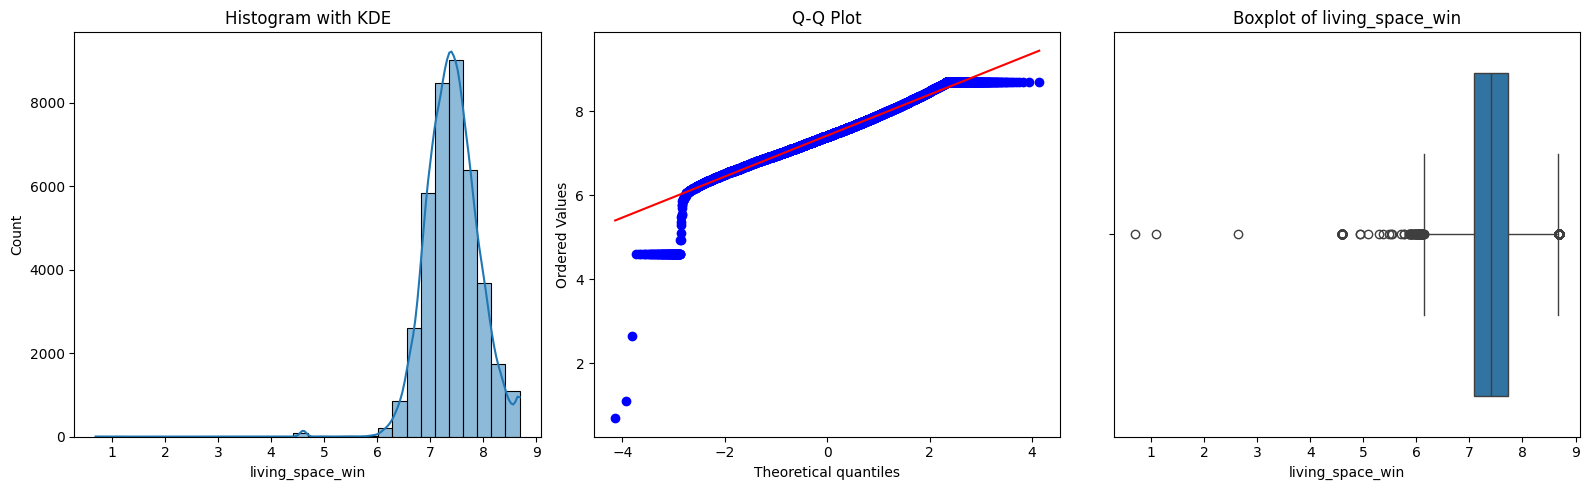

In [ ]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_no_outliers['living_space_win'], kde=True, bins=30)
plt.title('Histogram with KDE')

plt.subplot(1, 3, 2)
probplot(df_no_outliers['living_space_win'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_no_outliers['living_space_win'])
plt.title(f'Boxplot of living_space_win')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd


vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                  Variable          VIF
0                    const  2063.560391
1           baths_centered    72.269161
2        sqrt_living_space     2.391986
3  baths_space_interaction    63.818022


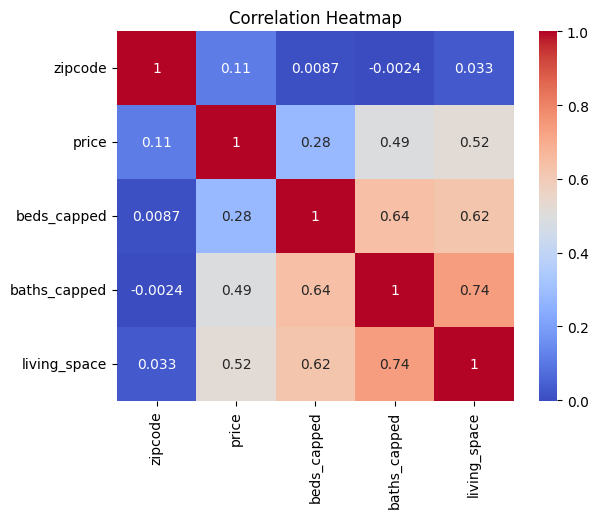

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_no_outliers[['zipcode','price', 'beds_capped', 'baths_capped', 'living_space']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(model.resid, X)
print(f'p-value for heteroscedasticity: {p_value}')


p-value for heteroscedasticity: 0.0


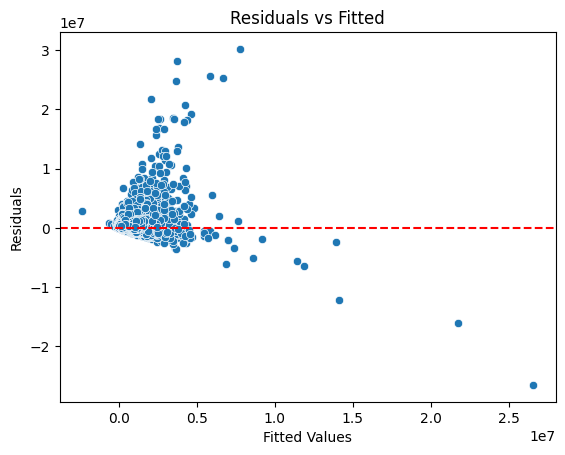

In [ ]:
residuals = model.resid
fitted = model.fittedvalues

sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()
